In [1]:
using PyPlot

INFO: Loading help data...


### Ejercicio 1

En clase vimos que la función `bits` permite ver la representación binaria de números de punto flotante (`Float64`) o de enteros (e.g., `Int64`). En particular, para números de punto flotante, el primer bit es el signo, los siguiente 11 son el *exponente* y el resto es la representación binaria (sin el 1 del principio), del número en cuestión.

La pregunta es ¿qué significa el exponente?
bits(1.0)
"0011111111110000000000000000000000000000000000000000000000000000"


Un número de punto flotante es la representación que aproxima un número real utilizando 52 dígitos para la interpretación de un número en base binaria (significand), 1 dígito para el signo y 11 para el exponente.
Entonces un número de punto flotante está dado por la siguiente relación.

$$ (−1)^{signo}\text{significand} \times \text{2}^\text{exponente}$$

Los 11 bits correspondientes al exponente permiten la representación de números decimales con exponente entre 10 y 308, con 15-17 bits de precisión.

### Ejercicio 2

a) ¿Cuál es el número más chico que sumado (o restado) a 1.0 me da algo distinto de 1.0?
(Este número se bautiza como el "épsilon de la máquina")

b) ¿Cuál es el número más chico que sumado (o restado) a 10.0 me da algo distinto de 10.0?


La función $epsilon(x_0)$ nos devuelve el número más chico que sumado o restado a $x_0$ no cambia el valor de $x_0$. 

In [3]:
function epsilon(x_0)
    x=x_0
while x_0 +x >x_0
        x=x/2
    end
    x
end


epsilon (generic function with 1 method)

In [4]:
1+epsilon(1)

1.0

In [31]:
epsilon(1)

1.1102230246251565e-16

In [5]:
epsilon(10)

5.551115123125783e-16

In [29]:
10+epsilon(10)

10.0

In [30]:
10-epsilon(10) 

10.0

### Ejercicio 3

Define una functión llamada `derivada1` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0)}{h}
$$

Obviamente esta función es una aproximación *finita* de la derivada. La pregunta es ¿qué tan buena es esta aproximación, pensando en términos de $h$?

- La primer sub-pregunta es ¿cómo se responde este tipo de pregunta?
- Uno tiene que tomar un caso concreto (para $f(x_0,h)$); sugiero empezar con un polinomio con coeficientes enteros, y después hacer el mismo tipo de pruebas con una función trascendental.
- ¿Hay algo *sorprendente* en el comportamiento de `derivada1` como función de $h$? ¿A qué lo puedes atribuir?
- ¿Puedes hacer que la función `derivada1` funcione para funciones más o menos arbitrarias, que el usuario define?
- ¿Puedes explicar de alguna manera los resultados que has obtenido?

In [10]:
function derivada1(f,x_0,h)
  
(f(x_0+h)-f(x_0))/h
end

derivada1 (generic function with 1 method)

La medida de qué tan buena es la aproximación depende de $h$, entre más pequeña sea $h$ tendremos una nueva aproximación.

In [11]:
polinomio(x)=x^5+x^2-1
d_polinomio(x)=5*x^4+2*x
die(x)=sin(x)
hola(x)=cos(x)

hola (generic function with 1 method)

La función $arreglo(f,n,\delta x)$ toma como argumento una función, $n$ el tamaño del intervalo de nuestro arreglo y el tamaño de paso $\delta x$.

In [12]:
function arreglo(f,n,δx)
    x=[1:δx:n]
 
    a=zeros([1:δx:n])
    for i in 1:length(a)
        a[i]=f(x[i])
    end
    hcat(x,a)
end

arreglo (generic function with 1 method)

In [13]:
function arreglo_derivadas(f,δx,n,h,derivada)
    x=[1:δx:n]
  a=zeros(x)
    for i in 1:length(a)
        a[i]=derivada(f,x[i],h)
        
    end
    hcat(x,a)
end

arreglo_derivadas (generic function with 1 method)

In [14]:
aixis=arreglo(hola,10,.01);

In [15]:
diegui=arreglo_derivadas(die,.1,10,.01,derivada1);
mari=arreglo_derivadas(die,.1,10,.1,derivada1);

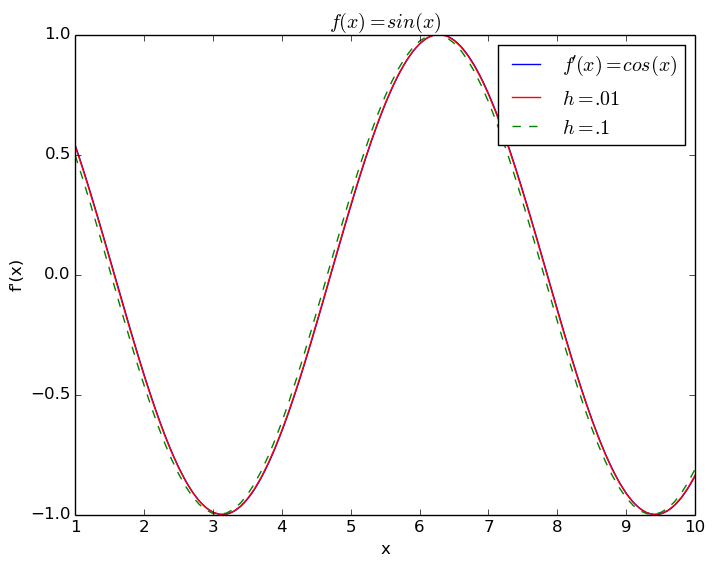

In [16]:
plot(aixis[:,1],aixis[:,2],label=L"f '(x)=cos(x)")
plot(diegui[:,1],diegui[:,2],label=L"h=.01","r")
plot(mari[:,1],mari[:,2],label=L"h=.1","--")
ylabel("f'(x)")
xlabel("x")
title(L"$f(x)=sin(x)$")
legend();

Podemos ver que tomando $h=.01$, $f'(x)$ se aproxima mejor a $cos(x)$.

En la siguiente gráficas se muestra el polinomio $f(x)=x^5+x^2-1$ y su derivada $f'(x)=5x^4+2x$

In [17]:
ñ=arreglo_derivadas(polinomio,.1,10,.01,derivada1);
ñ_1=arreglo_derivadas(polinomio,.1,10,.1,derivada1);
ñ_2=arreglo(d_polinomio,10,.01);

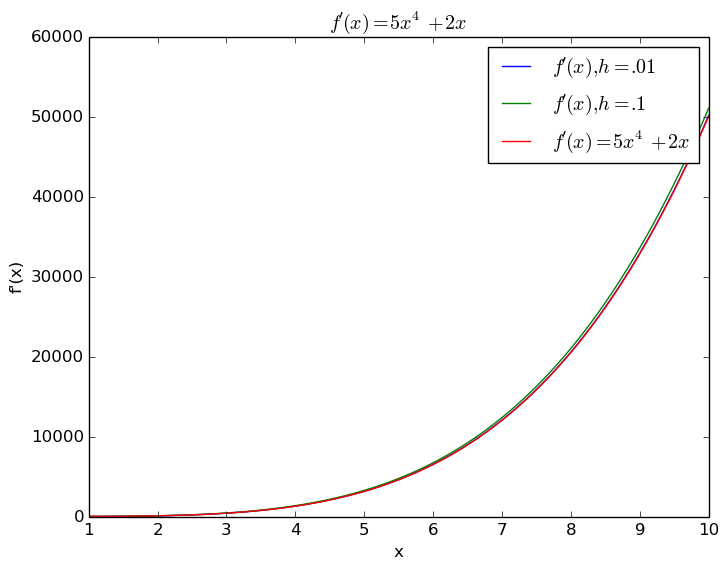

In [18]:
plot(ñ[:,1],ñ[:,2],label=L"$f'(x),h=.01$")
plot(ñ_1[:,1],ñ_1[:,2],label=L"$f'(x),h=.1$")
plot(ñ_2[:,1],ñ_2[:,2],label=L"$f '(x)=5x^4+2x$")
title(L"$f'(x)=5x^4+2x$")
ylabel("f'(x)")
xlabel("x")
legend();

A partir de $h=.01$ no se logran ver diferencia entre la aproximación de la derivada y la derivada teórica gráficamente, entonces simplemente compararemos la derivada de $f(x)=x^5+x^2-1$ con la derivada teórica $f(x)=5x^4+2x$ para distintas $h$ numéricamente en un punto $x_0=2$.

In [19]:
h=zeros(25);
for i in 1:25
    h[i] =  1 / (10^i)
end
function comparacion(derivada,x_0)
    a=zeros(25)
    for i in 1:25
    
        a[i]=abs(d_polinomio(x_0)-derivada(polinomio,x_0,h[i]))
end
    hcat(h,a)
    
end



comparacion (generic function with 1 method)

In [20]:
hola_1=comparacion(derivada1,2)

25x2 Array{Float64,2}:
  0.1           8.5101     
  0.01          0.81401    
  0.001         0.08104    
  0.0001        0.0081004  
  1.0e-5        0.000810005
  1.0e-6        8.10101e-5 
  1.0e-7        8.01601e-6 
  1.0e-8        1.55236e-7 
  1.0e-9        6.95019e-6 
  1.0e-10       6.95019e-6 
  1.0e-11       0.000362222
  1.0e-12       0.00746765 
  1.0e-13       0.0849029  
  1.0e-14       1.97567    
  1.0e-15      12.9457     
  1.0e-16      84.0        
  1.0e-17      84.0        
  1.0e-18      84.0        
 -1.18389e-19  84.0        
  1.28762e-19  84.0        
  2.5801e-19   84.0        
  5.36276e-19  84.0        
  4.99061e-18  84.0        
  4.99061e-19  84.0        
  6.28576e-19  84.0        

Podemos ver que para $h=10^{⁻8}$, $derivada1$ alcanza su mejor aproximación. Para $h<10^{-8}$ el error crece y en $ 10^{⁻16}$ alcanza un error constante de $84$.

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


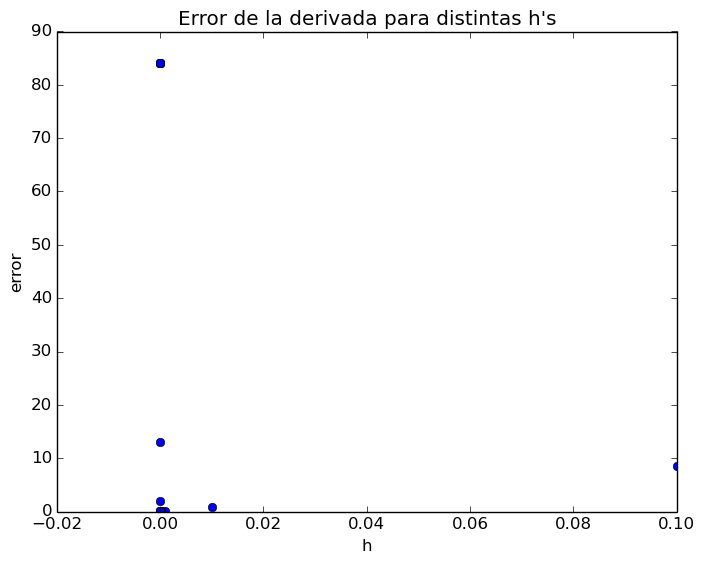

In [21]:
plot(hola_1[:,1],hola_1[:,2],"bo")
title("Error de la derivada para distintas h's")
ylabel("error")
xlabel("h")
legend()

### Ejercicio 4

Este ejercicio es equivalente al anterior, pero considerando la función `derivada2` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}
$$

¿Puedes explicar por qué la convergencia es mejor en este caso?


In [22]:
function derivada2(f,x_0,h)
    
    (f(x_0+h)-f(x_0-h))/2h
end

derivada2 (generic function with 1 method)

Graficaremos la $derivada_1$, la $derivada_2$ y la derivada teórica para $f(x)=x^5+x^2-1$.

In [23]:

w=arreglo_derivadas(polinomio,.1,10,.1,derivada2);

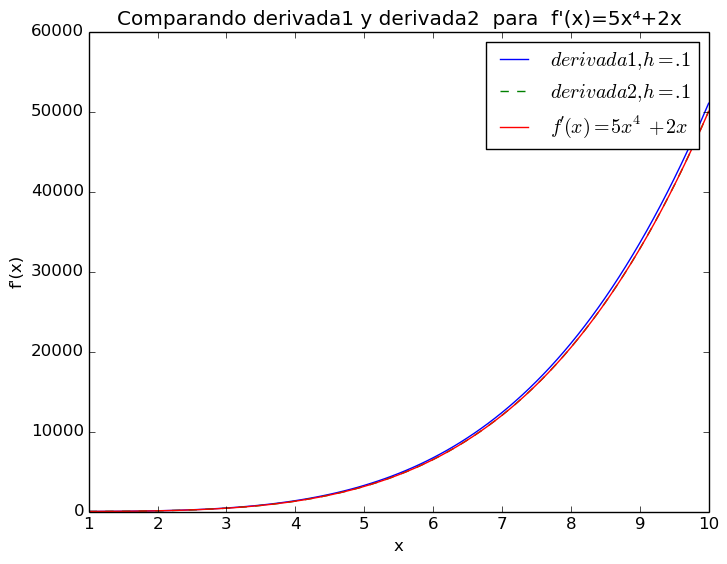

PyObject <matplotlib.legend.Legend object at 0x7f3c57e18110>

In [24]:
plot(ñ_1[:,1],ñ_1[:,2],label=L"$derivada1,h=.1$")
plot(w[:,1],w[:,2],label=L"$derivada2,h=.1$", "--")
plot(ñ_2[:,1],ñ_2[:,2],label=L"$f '(x)=5x^4+2x$")
title("Comparando derivada1 y derivada2  para  f'(x)=5x⁴+2x")
ylabel("f'(x)")
xlabel("x")
legend()

Podemos ver que la aproximación es mucho mejor para $derivada_2$ en $h=.1$

In [25]:
hola_2=comparacion(derivada2,2)

25x2 Array{Float64,2}:
  0.1           0.4001     
  0.01          0.00400001 
  0.001         4.0e-5     
  0.0001        4.00053e-7 
  1.0e-5        4.63592e-9 
  1.0e-6        1.08321e-9 
  1.0e-7        1.31276e-8 
  1.0e-8        8.65779e-7 
  1.0e-9        6.95019e-6 
  1.0e-10       6.95019e-6 
  1.0e-11       0.000362222
  1.0e-12       0.00746765 
  1.0e-13       0.0849029  
  1.0e-14       0.909857   
  1.0e-15       2.28759    
  1.0e-16      84.0        
  1.0e-17      84.0        
  1.0e-18      84.0        
 -1.18389e-19  84.0        
  1.28762e-19  84.0        
  2.5801e-19   84.0        
  5.36276e-19  84.0        
  4.99061e-18  84.0        
  4.99061e-19  84.0        
  6.28576e-19  84.0        

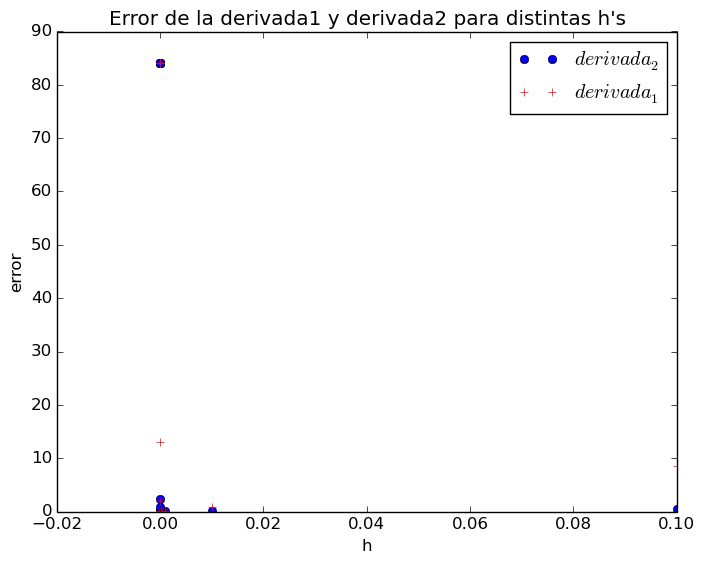

PyObject <matplotlib.legend.Legend object at 0x7f3c56aa6d50>

In [32]:
plot(hola_2[:,1],hola_2[:,2],"bo",label=L"$derivada_2$")
plot(hola_1[:,1],hola_1[:,2],"r+",label=L"$derivada_1$")
title("Error de la derivada1 y derivada2 para distintas h's")
ylabel("error")
xlabel("h")
legend()

Ahora veamos la diferencia entre los errores de $derivada1$ y $derivada2$.

In [28]:
hola_1[:,2]-hola_2[:,2]

25-element Array{Float64,1}:
  8.11      
  0.81001   
  0.081     
  0.0081    
  0.00081   
  8.1009e-5 
  8.00288e-6
 -7.10543e-7
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  1.06581   
 10.6581    
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       

Podemos ver que si $h<10^-8$, el error de $derivada1>derivada2$

El error es proporcional a $2h$ entonces el error de $derivada2$ diminuye con el doble de rapidez que el error de $derivada1$ que es proporcional a $h$.